### Импорт библиотек

In [218]:
import pandas as pd
import plotly
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns



### Описание столбцов

Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

### Чтение таблицы

In [219]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [220]:
churn_data = churn_data.drop('RowNumber', axis=1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [221]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

([<matplotlib.patches.Wedge at 0x1697ed610>,
 [Text(-0.962556155622219, 0.7165791284106557, 'Лояльные'),
  Text(0.8823431426537006, -0.6568642010431012, 'Ушедшие')],
 [Text(-0.5614910907796277, 0.41800449157288244, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

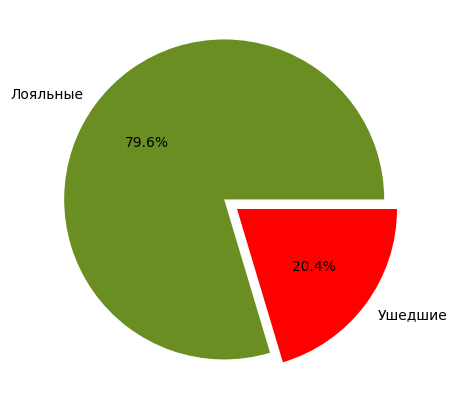

In [222]:
#считаем количество ушедших и количество лояльных клиентов

exited_data = churn_data['Exited'].value_counts()

# отображаем соотношение на круговой диаграмме
fig = plt.figure(figsize=(8, 8))
axes = fig.add_axes([0, 0, 0.5, 0.5])
axes.pie(
    exited_data,
    labels=['Лояльные','Ушедшие'],
    colors=['olivedrab', 'red'],
    autopct='%.1f%%',
    explode = [0.1, 0]
)


Отток составляет порядка 20%, что не мало для числа клиентов составляющих 10 000 клиентов. Это означает что каждый пятный клиент покидает банк. 

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

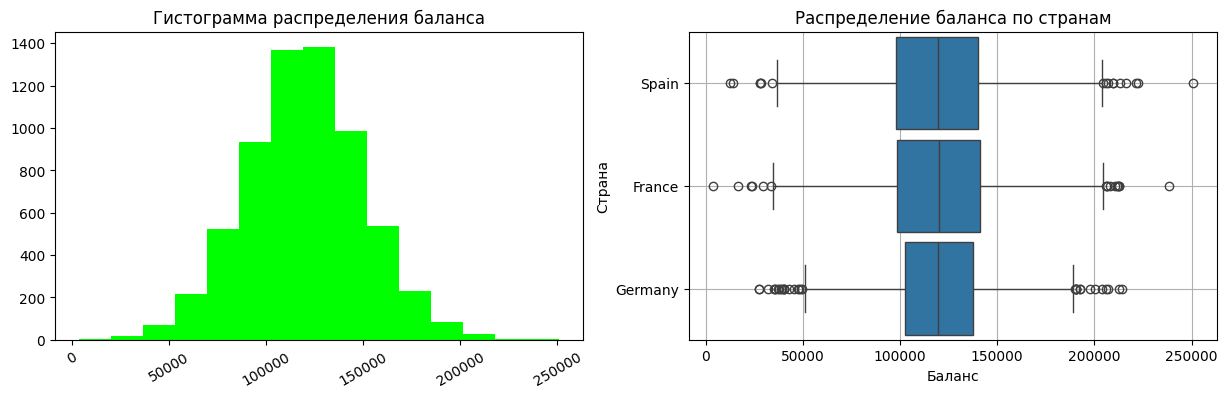

In [223]:
balance_data = churn_data[churn_data['Balance'] > 2500]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

# гистограмма
axes[0].hist(
    x=balance_data["Balance"], label=["Число клиентов"], color="lime", bins=15
)
axes[0].set_title("Гистограмма распределения баланса")
axes[0].xaxis.set_tick_params(rotation=30)

# ящик с усами 
axes[1] = sns.boxplot(
    data=balance_data,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9
)
axes[1].set_title('Распределение баланса по странам');
axes[1].set_xlabel('Баланс');
axes[1].set_ylabel('Страна');
axes[1].grid()



Распределение баланса у большинства клиентов находится в диапазоне от 90 000 до 150 000. Что говорит о том что этот банк используется не для хранения накоплений, а как зарплатный банк. Распределение по странам говорит нам об однообразной картине. Медиана баланса во всех странах идентичная и составляет порядка 120 тыс. Присутствует некоторое количество отклонений до 40 и свыше 200000 тыс. 

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

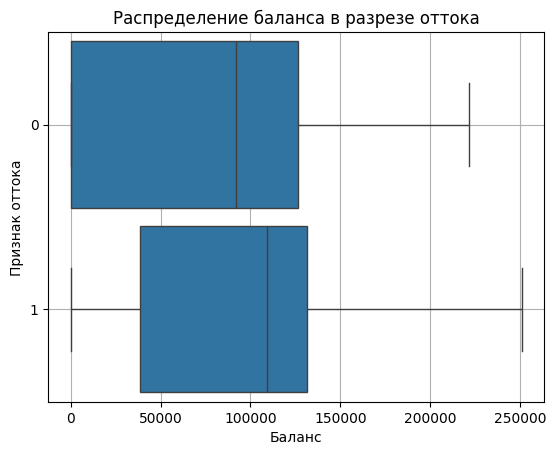

In [224]:
# ящик с усами 
boxpot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxpot.set_title('Распределение баланса в разрезе оттока');
boxpot.set_xlabel('Баланс');
boxpot.set_ylabel('Признак оттока');
boxpot.grid()

Рапределеение среднего баланса у ушедших и лояльных клиентов практически одинаковое. Нет клиентов с нулевым балансом которые ушли. Предполагаю что отток зависит от качества или условий банка по услугам. Или это связано с кредитной политикой банка, что более вероятно. 

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [225]:


# распределение возрастов в разрезе оттока
fig = px.box(data_frame=churn_data, 
             x = 'Age', 
             color='Exited',
             title='Распределение возраста в разрезе признака оттока',
             labels={"Age": "Возраст клиентов"}
             
)
# настраиваем легенду
label_mapping = {"0": "Лояльный", "1":"Ушедший"}
fig.for_each_trace(lambda t: t.update(name=label_mapping.get(t.name, t.name)))
fig.update_layout(legend_title_text="Отток")

fig.update_legends()
fig.show()

Больше всего выбросов среди лояльных клиентов. Банку стоит обратить внимание на людей в возрасте от 38 до 51 года. 

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [226]:
# распределение возрастов в разрезе оттока
fig = px.scatter(data_frame=churn_data, 
             x = 'EstimatedSalary',
             y = 'CreditScore', 
             color='Exited',
             title='Распределение возраста в разрезе признака оттока',
             labels={"EstimatedSalary": "Зарплата", "CreditScore":"Кредитный рейтинг"}
             
)
fig.show()

Явной зависимости между признаками не наблюдаю.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [227]:
gender_group = churn_data.groupby(by='Gender', as_index=False)['Exited'].mean().round(1)

# Сделаем график отражающий процент ушедших из банка женщин и мужчин
fix = px.bar(
    data_frame=gender_group,
    x='Exited',
    y='Gender',
    color='Gender',
    
    orientation='h',
    height=500,
    width=1000,
    title="Who churn more often, men or women?"
    
)

#отображаем его
fix.show()

Женщины перестают быть клиентами банка чаще чем мужчины. 

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [228]:
# группируем клиентов по количеству приобретенных услуг и считаем количество ушедших и лояльных клиентов в каждой группе
num_of_products = churn_data.groupby(by='NumOfProducts', as_index=False)['Exited'].value_counts()

fig = px.bar(
    data_frame=num_of_products,
    x='NumOfProducts',
    y='count',
    color='Exited',
    
    orientation='v',
    height=500,
    width=500,
    title="Number of clients who left depending on the number of services purchased",
    
    labels={"count": "Number of clients", "NumOfProducts": "Number of Products"}
)

# настраиваем легенду
label_mapping = {"0": "Loyal", "1":"Churn"}
fig.for_each_trace(lambda t: t.update(name=label_mapping.get(t.name, t.name)))
fig.update_layout(legend_title_text="Exited")

fig.update_legends()


fig.show()

Видим что при количестве услуг 3 и более количество ушедших клиентов превалирует над количеством оставшихся. Также видим что отток клиентов с одной услугой больше чем с двумя услугами. 

In [229]:
# группируем клиентов по количеству приобретенных услуг и считаем количество ушедших и лояльных клиентов в каждой группе
active_clients = churn_data.groupby(by='IsActiveMember', as_index=False)[['Exited']].value_counts()


fig = px.bar(
    data_frame=active_clients,
    x='IsActiveMember',
    y='count',
    color='Exited',
    
    orientation='v',
    height=500,
    width=500,
    title="Number of clients who left depending on the number of services purchased",
    
    labels={"count": "Number of clients", "IsActiveMember": "Аctive =  Not Active"}
)

# настраиваем легенду
label_mapping = {"0": "Loyal", "1":"Churn"}
fig.for_each_trace(lambda t: t.update(name=label_mapping.get(t.name, t.name)))
fig.update_layout(legend_title_text="Exited")

fig.update_legends()


fig.show()

Отток у неактивных клиентов почти в два раза выше чем у актиных клиентов. Для уменьшения оттока я бы порекомендовал допродать неактивным клиентам услугу. 

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [230]:

country_churn = churn_data.groupby(
    by='Geography',
    as_index=False
)[['Exited']].mean()

#строим график
fig = px.treemap(
    data_frame=country_churn, #DataFrame
    path=['Geography'], #категориальный признак, для которого строится график
    values='Exited', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем график
fig.show()

Самая большая доля ушедших клиентов в Германии. Превышает этот показатель почти в два раза.

### 9.10 На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [231]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

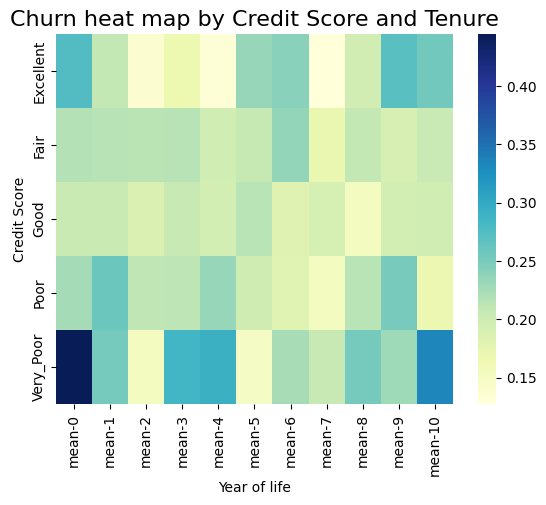

In [232]:
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc=['mean']
)


heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Churn heat map by Credit Score and Tenure', fontsize=16)

heatmap.set_xlabel('Year of life');
heatmap.set_ylabel('Credit Score');
boxpot.grid()



Больше всего уходят новые клиенты с низким кредитным рейтингом.  ДА и в принципе банк покидают клиенты с плохим кредитным рейтингом. Опасным сроком жизни клиента являются: новые клиенты, и 9,10 лет (отличный кредитный рейтинг).